## Two Way ANOVA using Statsmodels

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

data = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv'

df = pd.read_csv(data, index_col=0)

df.head(60)


,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5
7,11.2,VC,0.5
8,11.2,VC,0.5
9,5.2,VC,0.5
10,7.0,VC,0.5


### Getting Effect Sizes

In [2]:

# ANOVA
formula = 'len~C(supp)+C(dose)+C(supp):C(dose)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


In [3]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov


eta_squared(aov_table)
omega_squared(aov_table)

print(aov_table.round(4))

                    sum_sq    df       F  PR(>F)  eta_sq  omega_sq
C(supp)           205.3500   1.0  15.572  0.0002  0.0595    0.0555
C(dose)          2426.4343   2.0  92.000  0.0000  0.7029    0.6926
C(supp):C(dose)   108.3190   2.0   4.107  0.0219  0.0314    0.0236
Residual          712.1060  54.0     NaN     NaN     NaN       NaN


### Plotting the Residuals:

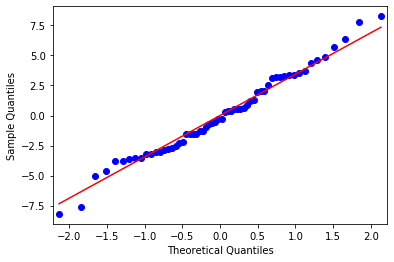

In [4]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()